# ***🔗 [Customer Churn Prediction Dataset](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset)***

## ***```<<<✨ 1. Import Required Libraries ✨>>>```***

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [30]:
# ===========================
# Import Required Libraries
# ===========================

# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Import ydata_profiling to create an automatic data analysis report
from ydata_profiling import ProfileReport

# Used to measure how much each feature contributes to predicting the target variable.
from sklearn.feature_selection import mutual_info_classif

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, RocCurveDisplay, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## ***```<<<✨ 2. Load the Dataset ✨>>>```***

In [31]:
# Load the churn dataset (update with your path)
data = pd.read_csv("/content/Customer_Churn_Dataset-Training.csv")

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## ***```<<<✨ 3. Inspect the Dataset ✨>>>```***

In [32]:
# Display the first 5 rows
data.head()

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0

In [33]:
# Check dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
None


In [34]:
# Summarizes key statistics of the dataset’s numeric columns
data.describe().T

count           mean            std    min        25%  \
CustomerID        440832.0  225398.667955  129531.918550    2.0  113621.75   
Age               440832.0      39.373153      12.442369   18.0      29.00   
Tenure            440832.0      31.256336      17.255727    1.0      16.00   
Usage Frequency   440832.0      15.807494       8.586242    1.0       9.00   
Support Calls     440832.0       3.604437       3.070218    0.0       1.00   
Payment Delay     440832.0      12.965722       8.258063    0.0       6.00   
Total Spend       440832.0     631.616223     240.803001  100.0     480.00   
Last Interaction  440832.0      14.480868       8.596208    1.0       7.00   
Churn             440832.0       0.567107       0.495477    0.0       0.00   

                       50%        75%       max  
CustomerID        226125.5  337739.25  449999.0  
Age                   39.0      48.00      65.0  
Tenure                32.0      46.00      60.0  
Usage Frequency       16.0      23.00      30.0  
Support Calls          3.0       6.00      10.0  
Payment Delay         12.0      19.00      30.0  
Total Spend          661.0     830.00    1000.0  
Last Interaction      14.0      22.00      30.0  
Churn                  1.0       1.00       1.0

In [35]:
# Create and display the data profiling report
profile = ProfileReport(data, title="Data Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:07<00:00,  1.62it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## ***```<<<✨ 4. Data Cleaning ✨>>>```***

- ####  ***Handle Missing Values***

In [36]:
# Check for missing values
print(data.isnull().sum())


CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [37]:
# Remove all rows that contain any missing values
data = data.dropna()

In [38]:
# Check for missing values
print(data.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


- #### ***Handle Duplicates***

In [39]:
# Check for Duplicates
print("Number of Duplicate Rows:", data.duplicated().sum())

Number of Duplicate Rows: 0


- #### ***Drop Irrelevant Columns***

In [40]:
# Drop by column name
data = data.drop(columns=['CustomerID'])

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## ***```<<<✨ 5. Exploratory Data Analysis (EDA) ✨>>>```***

In [ ]:
data.head()

Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  30.0  Female    39.0             14.0            5.0           18.0   
1  65.0  Female    49.0              1.0           10.0            8.0   
2  55.0  Female    14.0              4.0            6.0           18.0   
3  58.0    Male    38.0             21.0            7.0            7.0   
4  23.0    Male    32.0             20.0            5.0            8.0   

  Subscription Type Contract Length  Total Spend  Last Interaction  Churn  
0          Standard          Annual        932.0              17.0    1.0  
1             Basic         Monthly        557.0               6.0    1.0  
2             Basic       Quarterly        185.0               3.0    1.0  
3          Standard         Monthly        396.0              29.0    1.0  
4             Basic         Monthly        617.0              20.0    1.0

#### ***1. Correlation Analysis***
- #### ***Purpose: Detect relationships between numeric features***

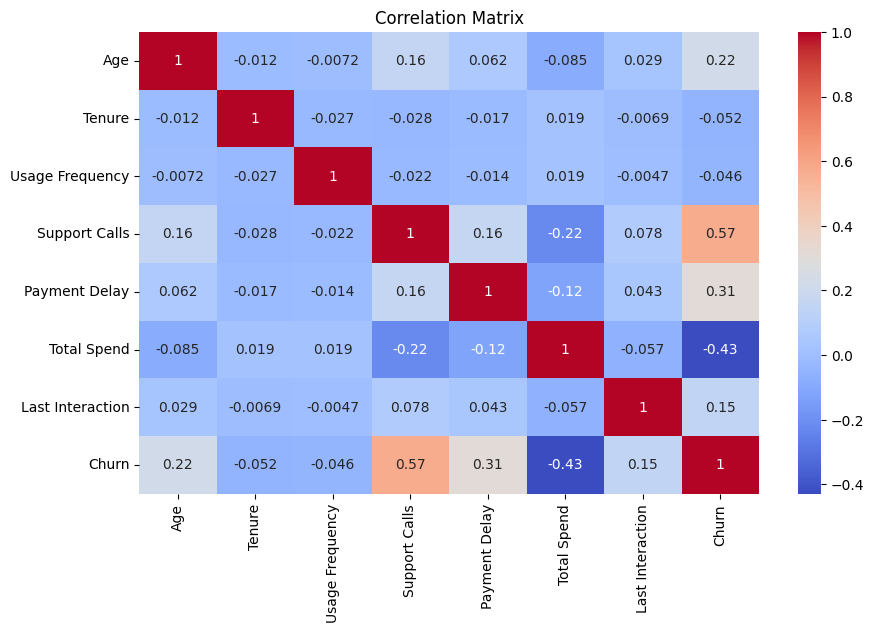

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

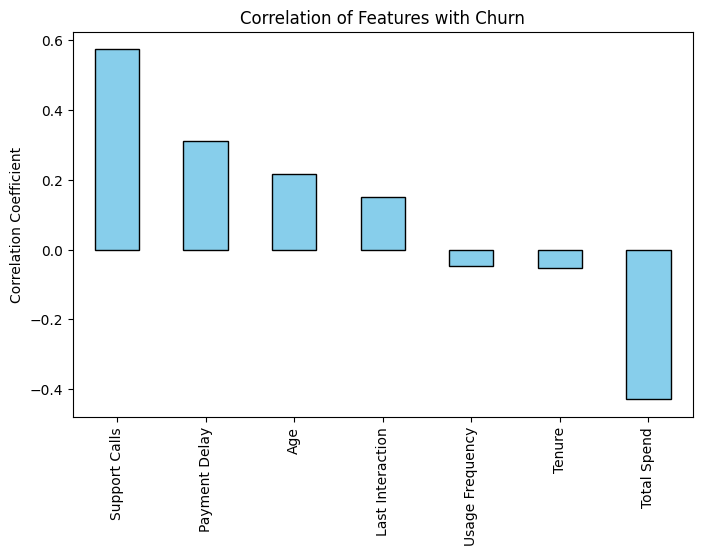

In [ ]:
# Correlation of features with Churn
corr_with_churn = corr_matrix["Churn"].drop("Churn").sort_values(ascending=False)

plt.figure(figsize=(8,5))
corr_with_churn.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Correlation of Features with Churn")
plt.ylabel("Correlation Coefficient")
plt.show()

- ***From the first plot we realize that support calls feature has the highest correlation with Churn***

- ***The second plot shows the features that have the highest correlation with the target variable (Churn)***

- ***The third plot shows the highly correlated features except for Churn***

---

| **Feature**           | **Correlation with Churn** | **Interpretation** |
|------------------------|----------------------------|--------------------|
| **Support Calls**      | +0.58 | Customers making more support calls are more likely to churn (unresolved issues). |
| **Payment Delay**      | +0.31 | Late payments are linked with higher churn risk. |
| **Age**                | +0.22 | Older customers show slightly higher churn tendency. |
| **Last Interaction**   | +0.15 | Long gaps since last contact indicate higher churn risk. |
| **Usage Frequency**    | -0.04 | Frequent usage slightly reduces churn probability. |
| **Tenure**             | -0.06 | Long-term customers are more loyal and less likely to churn. |
| **Total Spend**        | -0.41 | High-spending customers are less likely to leave. |

---

#### ***2. Age Distribution and Churn Rate:***

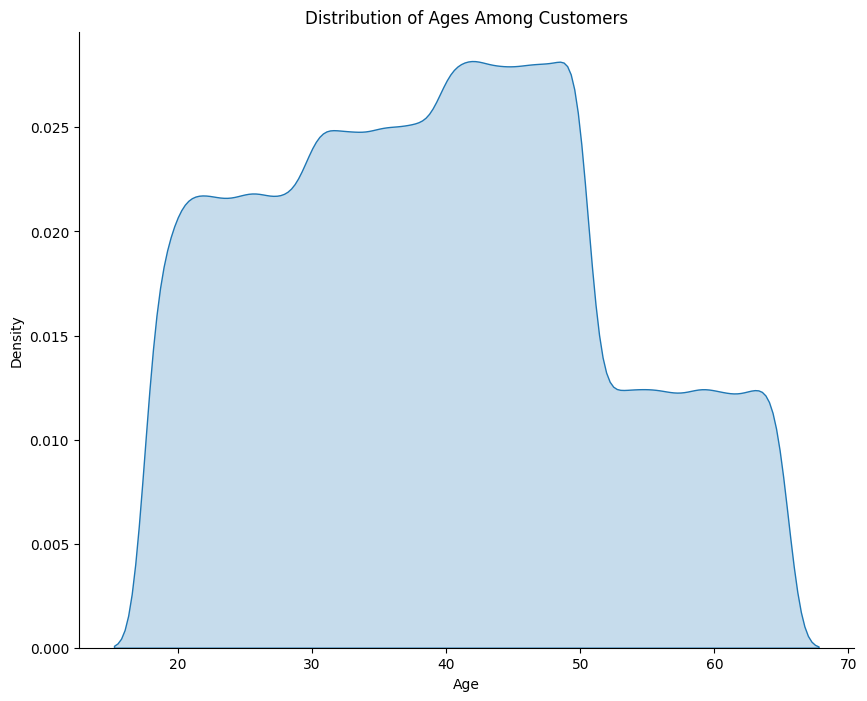

In [ ]:
# Age Distribution

plt.figure(figsize=(10,8))
sns.kdeplot(data = data , x = data.Age , fill = True , common_norm=False)
plt.title('Distribution of Ages Among Customers')
sns.despine()
plt.show()

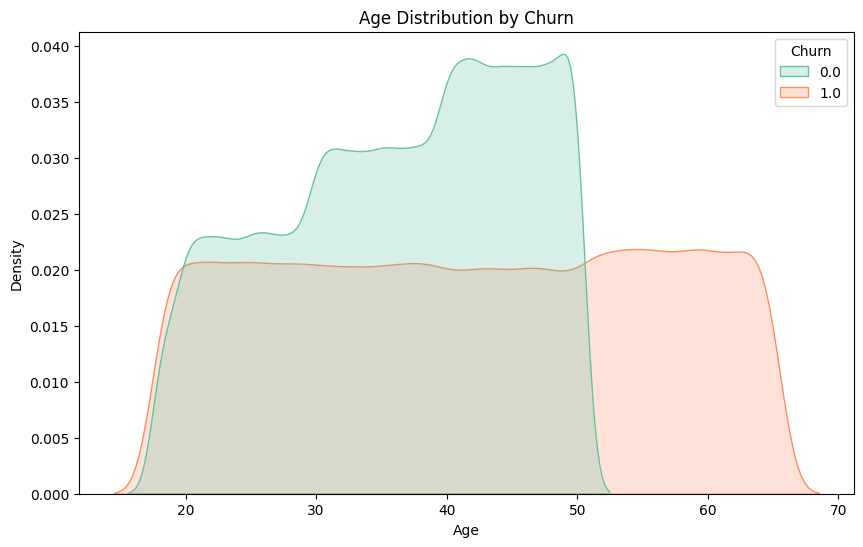

In [ ]:
# Age Distribution by Churn

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Age', hue='Churn', common_norm=False, fill=True, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()

- ***Age is normally distributed but is slighlty positively skewed which means we have more younger Customers***

- ***We have a significant number of customers in the 40-50 age range, with a smaller but still substantial group in the 20-30 age range***

- ***as you can see almost half of the customers in the 20-30 group Churn but the churn rate drops for the next age groups until 41-50 age group***

#### ***3. Gender Analysis:***

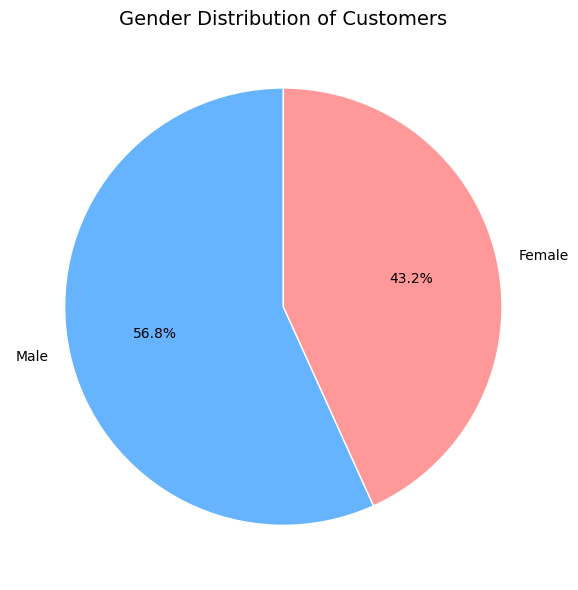

In [ ]:
# Gender Distribution of Customers

# Calculate gender counts
gender_counts = data['Gender'].value_counts()

# Create a simple pie chart (non-interactive)
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    wedgeprops={'edgecolor': 'white'}
)

# Add title and show the plot
plt.title('Gender Distribution of Customers', fontsize=14)
plt.tight_layout()
plt.show()


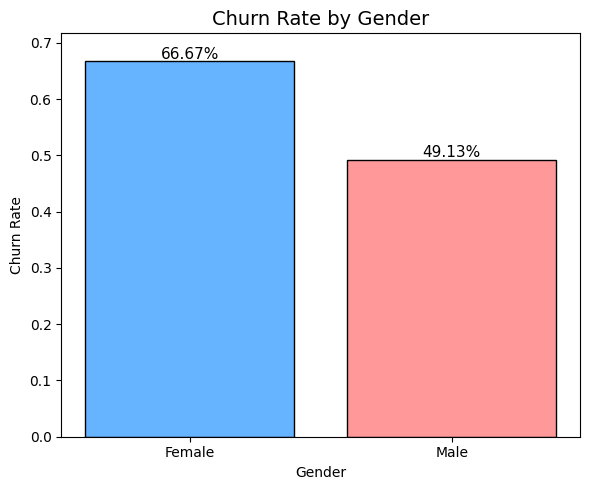

In [ ]:
# Churn Rate by Gender

# Calculate churn rate per gender
gender_churn_rate = data.groupby('Gender')['Churn'].mean().reset_index()

# Create a simple non-interactive bar chart
plt.figure(figsize=(6, 5))
plt.bar(
    gender_churn_rate['Gender'],
    gender_churn_rate['Churn'],
    color=['#66b3ff', '#ff9999'],
    edgecolor='black'
)

# Add percentage labels above bars
for index, value in enumerate(gender_churn_rate['Churn']):
    plt.text(index, value + 0.005, f"{value:.2%}", ha='center', fontsize=11)

# Customize labels and title
plt.title('Churn Rate by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.ylim(0, gender_churn_rate['Churn'].max() + 0.05)

# Display chart
plt.tight_layout()
plt.show()


- ***More than half of the customers are Male***

- ***The churn rate of the female customers are much higher than the male customers***

#### ***4. Churn by Tenure:***

In [ ]:
# Churn by Tenure

# Ensure 'Tenure' is numeric
data['Tenure'] = pd.to_numeric(data['Tenure'], errors='coerce')

# Calculate average churn rate per tenure value
tenure_churn = data.groupby('Tenure')['Churn'].mean().reset_index()

# Create interactive line + scatter chart
fig = px.scatter(
    tenure_churn,
    x='Tenure',
    y='Churn',
    title='Churn Rate by Customer Tenure (Continuous)',
    color='Churn',
    color_continuous_scale='RdYlGn_r',
    trendline='lowess',   # smooth trend line
    labels={'Churn': 'Churn Rate', 'Tenure': 'Tenure (Months)'}
)

# Adjust layout for a clear and balanced look
fig.update_layout(
    title_x=0.5,
    width=900,
    height=550,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(size=15),
    yaxis_tickformat='.0%',
)

# Improve hover details
fig.update_traces(
    hovertemplate='<b>Tenure:</b> %{x}<br>Churn Rate: %{y:.2%}',
    marker=dict(size=8, line=dict(width=1, color='black'))
)

fig.show()

- ***We can see that we have custmores with almost equally distributed Tenures***

- ***The churn rate in new customers(1-5 tenure) and 12 to 24 month tenure is higher than others***

- ***The churn rate for other customers is almost half***

#### ***5. Support Calls vs Churn:***

In [ ]:
# Create interactive grouped bar chart
fig = px.histogram(
    data,
    x='Support Calls',
    color='Churn',
    barmode='group',
    title='Churn Pattern by Support Calls',
    color_discrete_sequence=['#EF553B', '#00CC96']
)

# Adjust layout for a balanced, clean appearance
fig.update_layout(
    title_x=0.5,
    width=750,
    height=500,
    xaxis_title='Support Calls',
    yaxis_title='Customer Count',
    bargap=0.2,
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

# Add hover tooltips
fig.update_traces(
    hovertemplate='<b>Support Calls:</b> %{x}<br><b>Customers:</b> %{y}<br><b>Churn:</b> %{color}'
)

# Show chart
fig.show()


- Customers with **fewer support calls (0–2)** tend to stay, while those with **many calls (4+)** are more likely to **churn**.

- This suggests that **frequent support interactions** may signal **customer dissatisfaction** or **unresolved issues**.  

- Monitoring high support call activity can help identify at-risk customers early and improve retention.

#### ***6. Subscription Type vs Churn***

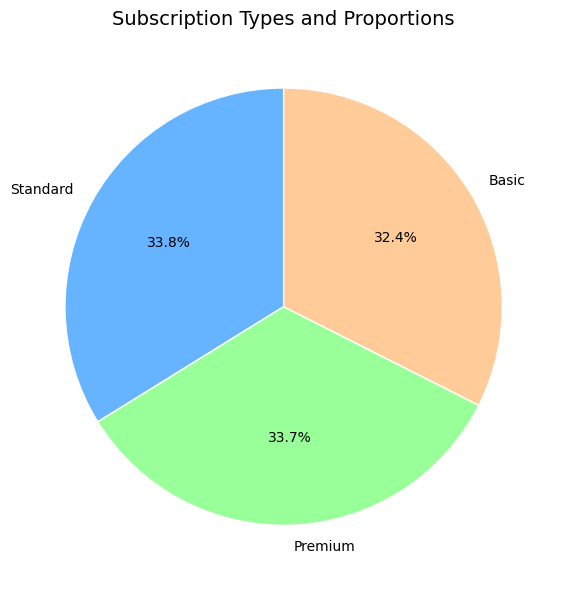

In [ ]:
# Calculate subscription counts
subscription_counts = data['Subscription Type'].value_counts()

# Create a simple non-interactive pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    subscription_counts,
    labels=subscription_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99'],
    wedgeprops={'edgecolor': 'white'}
)

# Add title and display chart
plt.title('Subscription Types and Proportions', fontsize=14)
plt.tight_layout()
plt.show()

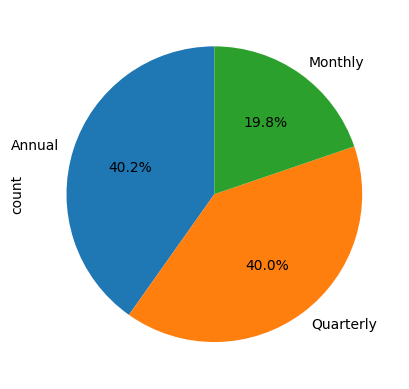

In [ ]:
# Churn Rate by Subscription Type

contract_counts = data['Contract Length'].value_counts()

contract_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.show()

- ***The subscription types have eqaul proportions of the data***

- ***The churn rate among the subscription types is also equal***

- ***Almost half of customers with annual and quarterly contracts churn, but customers with monthly contracts all churn***

#### ***7. Total Spend vs Churn:***

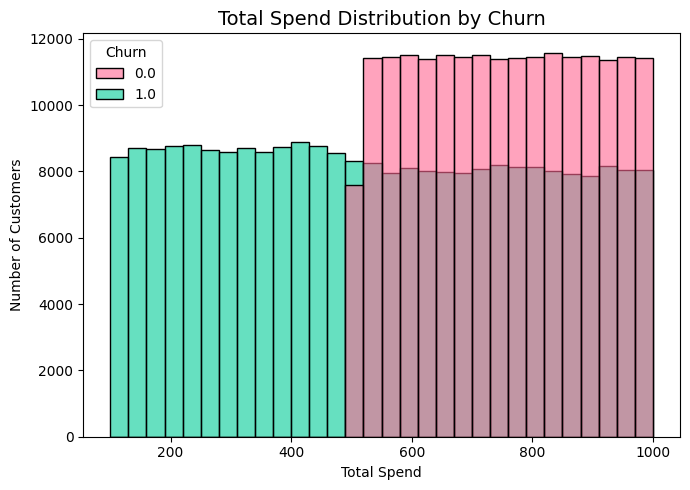

In [ ]:
# Total Spend Distribution by Churn (Overlay Histogram)

plt.figure(figsize=(7, 5))
sns.histplot(
    data=data,
    x='Total Spend',
    hue='Churn',
    bins=30,
    kde=False,
    alpha=0.6,
    palette=['#FF6692', '#00CC96']
)

# Add titles and labels
plt.title('Total Spend Distribution by Churn', fontsize=14)
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

- ***Each customer on average spends about 650$***

- ***Most customers with who spend more than 500$ tend not to churn***

#### ***8. Last Interaction vs Churn***

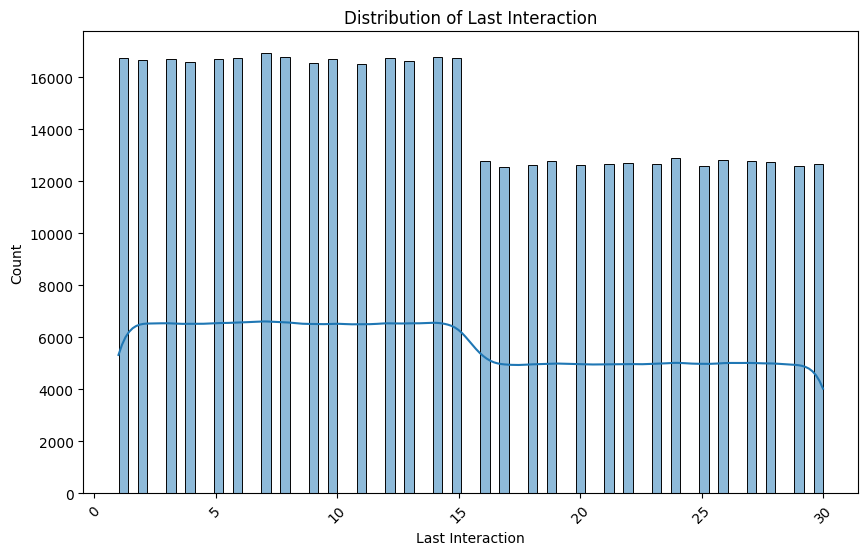

In [ ]:
# Distribution of Last Interaction
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Last Interaction', kde=True)
plt.xlabel('Last Interaction')
plt.ylabel('Count')
plt.title('Distribution of Last Interaction')
plt.xticks(rotation=45)
plt.show()

- ***Last ineteraction of customers has a uniform disribution but just slightly higher from 0 to 15***

- ***The churn rate by last inetraction shows no significant differennce so last inetraction has no or little impact on churn rate***

#### ***9. Churn Analysis (Target Variable)***

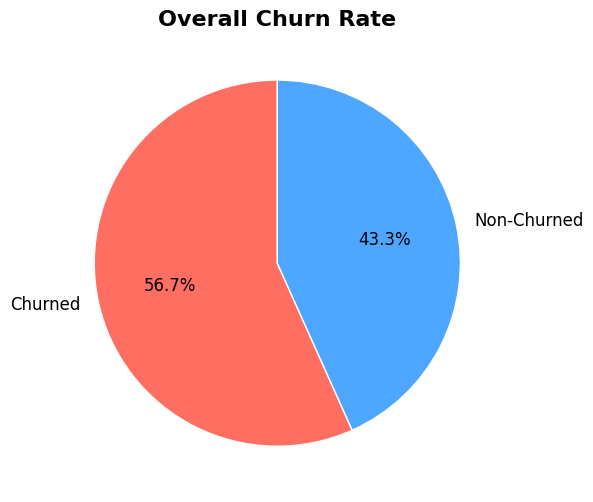

In [ ]:
#  Overall Churn Rate


# Calculate churn percentages
overall_churn_rate = data['Churn'].mean() * 100
churn_data = pd.DataFrame({
    'Status': ['Churned', 'Non-Churned'],
    'Percentage': [overall_churn_rate, 100 - overall_churn_rate]
})

# Create colorful pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    churn_data['Percentage'],
    labels=churn_data['Status'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff6f61', '#4da6ff'],
    textprops={'fontsize': 12, 'color': 'black'},
    wedgeprops={'edgecolor': 'white'}
)

# Add title and show chart
plt.title('Overall Churn Rate', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

- ***By analysing the target variable (Churn) we can see that most customers of our shop are churning!***

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## ***```<<<✨ 6. Feature Engineering ✨>>>```***

In [43]:
# Display the initial shape (rows, columns) of the dataset & list all column names

print("Initial Data Shape:", data.shape)
print("." * 70)
print("Columns:", data.columns.tolist())

Initial Data Shape: (440832, 11)
......................................................................
Columns: ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']


In [44]:
# Display the First 5 rows.

data.head()

Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  30.0  Female    39.0             14.0            5.0           18.0   
1  65.0  Female    49.0              1.0           10.0            8.0   
2  55.0  Female    14.0              4.0            6.0           18.0   
3  58.0    Male    38.0             21.0            7.0            7.0   
4  23.0    Male    32.0             20.0            5.0            8.0   

  Subscription Type Contract Length  Total Spend  Last Interaction  Churn  
0          Standard          Annual        932.0              17.0    1.0  
1             Basic         Monthly        557.0               6.0    1.0  
2             Basic       Quarterly        185.0               3.0    1.0  
3          Standard         Monthly        396.0              29.0    1.0  
4             Basic         Monthly        617.0              20.0    1.0

- **🧮 Feature Creation 🧮**

In [45]:
#  Spending & Usage Patterns

# Support intensity (calls per month)
data['Support_Intensity'] = data['Support Calls'] / (data['Tenure'] + 1)

In [46]:
#  Average Monthly Spend
# --------------------------------------------
# - Calculates the average amount spent per month of tenure.
# - Reflects spending consistency and customer value over time.

data['Avg_Spend_per_Month'] = data['Total Spend'] / data['Tenure'].replace(0, np.nan)

In [47]:
#  Customer Value Index
# --------------------------------------------
# - Combines total spending and payment reliability.
# - Higher values = high-value, reliable customers.
# - Lower values = risky, low-value customers with delays.

data['Customer_Value'] = data['Total Spend'] / (data['Payment Delay'] + 1)

- **🧮 Feature Selection 🧮**

In [48]:
# Separate features & target

X1 = data.drop(columns=['Churn'], errors='ignore')
y1 = data['Churn']

In [49]:
#  Encode non-numeric columns temporarily
#  (so we can calculate feature importance)

X_encoded = X1.copy()
for col in X_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    try:
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    except:
        X_encoded[col] = X_encoded[col].astype('category').cat.codes

In [50]:
#    Compute Mutual Information (fast + robust)
#    This measures how much each feature tells us about the target

mi_scores = mutual_info_classif(X_encoded.fillna(0), y1, random_state=42)

# Put results into a DataFrame for readability
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': mi_scores
}).sort_values(by='Importance', ascending=False)

In [51]:
#  Display top important features

print("=== Early Feature Importance (Before Processing) ===\n")
print(feature_importance)

=== Early Feature Importance (Before Processing) ===

                Feature  Importance
8           Total Spend    0.442032
12       Customer_Value    0.387125
11  Avg_Spend_per_Month    0.281358
4         Support Calls    0.248631
10    Support_Intensity    0.185875
7       Contract Length    0.156791
0                   Age    0.130761
5         Payment Delay    0.127067
1                Gender    0.057796
6     Subscription Type    0.020207
9      Last Interaction    0.016911
2                Tenure    0.005676
3       Usage Frequency    0.003488


In [52]:
# Select top-k features (you can adjust k)

k = 12
top_features = feature_importance.head(k)['Feature'].tolist()
print(f"\nTop {k} important features for target 'Churn': {top_features}")


Top 12 important features for target 'Churn': ['Total Spend', 'Customer_Value', 'Avg_Spend_per_Month', 'Support Calls', 'Support_Intensity', 'Contract Length', 'Age', 'Payment Delay', 'Gender', 'Subscription Type', 'Last Interaction', 'Tenure']


## 📊 Feature Importance Report — Target: `Churn`

### 🔝 Top 12 Most Influential Features

| Rank | Feature | Description |
|------|----------|-------------|
| 1 | **Total Spend** | Overall customer expenditure; strong indicator of engagement and value. |
| 2 | **Customer_Value** | Represents long-term worth or profitability of the customer. |
| 3 | **Avg_Spend_per_Month** | Measures spending consistency and monthly activity level. |
| 4 | **Support Calls** | High volume of support interactions may indicate dissatisfaction. |
| 5 | **Support_Intensity** | Frequency of support usage relative to tenure, highlighting service dependence. |
| 6 | **Contract Length** | Longer contracts often correspond to higher retention. |
| 7 | **Age** | Captures demographic influence on customer behavior and loyalty. |
| 8 | **Payment Delay** | Chronic delays may suggest churn risk due to payment issues. |
| 9 | **Gender** | May reveal minor behavioral variations affecting churn tendencies. |
| 10 | **Subscription Type** | Different subscription tiers exhibit varied churn probabilities. |
| 11 | **Last Interaction** | Recency of engagement; customers inactive for long are more prone to churn. |
| 12 | **Tenure** | Duration of customer relationship; longer tenure usually indicates loyalty. |

---

### 🧠 Insights

- **Behavioral drivers** (e.g., Support Calls, Last Interaction, Tenure) strongly impact churn prediction.  
- **Financial indicators** (Total Spend, Avg_Spend_per_Month, Payment Delay) are key in understanding customer stability.  
- **Contract and demographic features** (Contract Length, Age, Gender) provide additional context for retention strategies.  

> ✅ These twelve features form the foundation for a robust churn prediction model — balancing customer engagement, financial reliability, and demographic diversity.


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## ***```<<<✨ 7. Data Splitting ✨>>>```***

In [53]:
# Separate Features & Target

X = data.drop(columns=['Churn'])
y = data['Churn']

In [54]:
# Split the dataset into training and testing sets (80% train, 20% test)
# random_state=42 ensures reproducibility, and stratify=y keeps the same class distribution of 'Churn' in both sets.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## ⚠️ Why You Should NOT Preprocess Before Splitting

Preprocessing **before** splitting your data into **training** and **testing** sets might seem convenient,  
but it creates a serious issue known as **data leakage**, which can lead to **misleadingly high model performance** and **poor real-world results**.

---

### 🚨 The Core Problem: Data Leakage

**Data leakage** happens when information from the **test set** — data that should remain unseen —  
**influences the model during training** through preprocessing steps.

This means your model indirectly learns patterns from future or unseen data,  
which **invalidates** your model’s evaluation metrics (accuracy, F1-score, etc.).

---

### 🧩 Common Examples of Problems

#### 1. **Data Leakage in Scaling**
If you scale (standardize or normalize) the entire dataset **before** splitting:
- The scaler calculates the **mean and standard deviation** using *all* data — including the test set.
- As a result, the model “knows” information about test data distribution.
  
📉 **Impact:** The model performs unrealistically well during testing, but fails when deployed on real, unseen data.

Example:
```python
# ❌ Incorrect (causes leakage)
scaler.fit_transform(X)  # Uses test data statistics too


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## ***```<<<✨ 7. Preprocessing ✨>>>```***

In [55]:
print("Initial Data Shape:", data.shape)
print("." * 70)
print("Columns:", data.columns.tolist())

Initial Data Shape: (440832, 14)
......................................................................
Columns: ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn', 'Support_Intensity', 'Avg_Spend_per_Month', 'Customer_Value']


In [56]:
data.head()

Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  30.0  Female    39.0             14.0            5.0           18.0   
1  65.0  Female    49.0              1.0           10.0            8.0   
2  55.0  Female    14.0              4.0            6.0           18.0   
3  58.0    Male    38.0             21.0            7.0            7.0   
4  23.0    Male    32.0             20.0            5.0            8.0   

  Subscription Type Contract Length  Total Spend  Last Interaction  Churn  \
0          Standard          Annual        932.0              17.0    1.0   
1             Basic         Monthly        557.0               6.0    1.0   
2             Basic       Quarterly        185.0               3.0    1.0   
3          Standard         Monthly        396.0              29.0    1.0   
4             Basic         Monthly        617.0              20.0    1.0   

   Support_Intensity  Avg_Spend_per_Month  Customer_Value  
0           0.125000            23.897436       49.052632  
1           0.200000            11.367347       61.888889  
2           0.400000            13.214286        9.736842  
3           0.179487            10.421053       49.500000  
4           0.151515            19.281250       68.555556

- ***Encode Categorical Variables***

In [57]:
# Encode Categorical Variables (Safe for Deploy)
# ===============================================

categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

# Create a dictionary to store each column's encoder
encoders = {}

# Fit and transform each categorical column separately
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    encoders[col] = le  # store encoder for deployment

print("Categorical columns encoded successfully.")

Categorical columns encoded successfully.


- ***Feature Scaling***

In [58]:
# Scale Numerical Columns
# Standardize numerical features to have mean=0 and std=1
# ===============================================

numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical columns scaled successfully.")

Numerical columns scaled successfully.


---

In [59]:
# Import joblib to save and load trained models, encoders, and scalers efficiently.

import joblib

In [60]:
# Save Encoders & Scaler for Deployment
# ===============================================

joblib.dump(encoders, 'encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Encoders and Scaler saved successfully!")

Encoders and Scaler saved successfully!


In [61]:
X_train.head()

Age  Gender    Tenure  Usage Frequency  Support Calls  \
318331  0.210377       1  0.855271         1.651238      -0.197156   
429062 -0.512784       0  0.681455         0.137056      -0.848223   
60074  -1.075242       0 -1.056712         1.651238       0.128377   
12759  -0.834189       0 -1.288467         0.835909       2.081578   
357321 -0.111028       1 -1.230528         0.486483      -1.173756   

        Payment Delay  Subscription Type  Contract Length  Total Spend  \
318331      -1.085320                  2                0     1.300956   
429062       0.246158                  2                0     1.478368   
60074       -0.116972                  1                2     0.698312   
12759        1.335549                  0                2    -2.130477   
357321      -1.569494                  0                0     0.195568   

        Last Interaction  Support_Intensity  Avg_Spend_per_Month  \
318331         -0.753449          -0.359511            -0.273730   
429062         -0.288211          -0.455299            -0.247675   
60074          -1.102379           0.157583             0.166409   
12759           0.525957           1.822201            -0.352356   
357321          0.409648          -0.508264             0.234680   

        Customer_Value  
318331        0.655602  
429062       -0.235712  
60074        -0.237101  
12759        -0.634711  
357321        4.086665

- ***Convert Target Variable to Integer***

In [62]:
# Convert the target variable 'Churn' to integer type ( No=0, Yes=1 )

y = y.astype(int)

In [63]:
# Verify Preprocessing

print("---<<< Preprocessing completed successfully. >>>---\n")
print("Scaled numerical features:", numerical_cols)
print("Encoded categorical features:", categorical_cols)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

---<<< Preprocessing completed successfully. >>>---

Scaled numerical features: ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Support_Intensity', 'Avg_Spend_per_Month', 'Customer_Value']
Encoded categorical features: ['Gender', 'Subscription Type', 'Contract Length']

Training set shape: (352665, 13)
Testing set shape: (88167, 13)


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## ***```<<<✨ 8. Model Selection ✨>>>```***


## 🧠 Model Selection

### 🎯 Objective
The goal of this stage is to train and evaluate multiple machine learning models to predict **Customer Churn** — identifying which customers are likely to leave the service.  
After preprocessing (encoding, scaling, and splitting), several classification algorithms were applied and compared to determine the best-performing model based on **accuracy** and **ROC-AUC** scores.

---

### ⚙️ Models Used

| # | Model | Description |
|:-:|:------|:-------------|
| 1️⃣ | **Logistic Regression** | A simple yet powerful linear model used as a baseline for binary classification tasks. |
| 2️⃣ | **Decision Tree** | A tree-based model that splits the dataset based on feature values to make predictions. |
| 3️⃣ | **Random Forest** | An ensemble of decision trees that reduces overfitting and improves generalization. |
| 4️⃣ | **XGBoost (Extreme Gradient Boosting)** | A highly efficient boosting algorithm that iteratively improves model accuracy. |
| 5️⃣ | **K-Nearest Neighbors (KNN)** | A non-parametric model that classifies samples based on the majority class of their nearest neighbors. |

---

### 🧩 Model Training & Evaluation
Each model was trained using the **training dataset (80%)** and evaluated on the **testing dataset (20%)**.

For every model, the following metrics were calculated:

- ✅ **Training Accuracy** — How well the model fits the training data.  
- ✅ **Testing Accuracy** — How well the model generalizes to unseen data.  
- 🎯 **ROC-AUC Score** — Measures the ability of the model to distinguish between churned and non-churned customers.  
- 🧾 **Classification Report** — Includes precision, recall, and F1-score for both classes.  
- 🔢 **Confusion Matrix** — Visualizes model prediction performance.  
- 📈 **ROC Curve** — Plots the True Positive Rate vs. False Positive Rate for all classification thresholds.






# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## ***```<<<✨ 10. Model Building, Tuning & Evaluation ✨>>>```***


### ***⚖️ Logistic Regression ⚖️***

In [64]:
# Train the Logistic Regression model

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [65]:
# Predictions
y_train_pred_lr = log_reg.predict(X_train)
y_test_pred_lr = log_reg.predict(X_test)
y_test_prob_lr = log_reg.predict_proba(X_test)[:, 1]

In [66]:
# Evaluation
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_test_prob_lr)

print("--->>> Logistic Regression Performance <<<---\n")
print(f"Training Accuracy : {train_acc_lr:.4f}")
print(f"Testing Accuracy  : {test_acc_lr:.4f}")
print(f"ROC-AUC Score     : {roc_auc_lr:.4f}")
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_lr))

--->>> Logistic Regression Performance <<<---

Training Accuracy : 0.8538
Testing Accuracy  : 0.8533
ROC-AUC Score     : 0.9300

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83     38167
         1.0       0.88      0.86      0.87     50000

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167



In [67]:
print("\n🔹 Train Classification Report:")
print(classification_report(y_train, log_reg.predict(X_train)))

print("." * 60)

print("\n🔹 Test Classification Report:")
print(classification_report(y_test, log_reg.predict(X_test)))


🔹 Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83    152666
         1.0       0.88      0.85      0.87    199999

    accuracy                           0.85    352665
   macro avg       0.85      0.85      0.85    352665
weighted avg       0.86      0.85      0.85    352665

............................................................

🔹 Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83     38167
         1.0       0.88      0.86      0.87     50000

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167



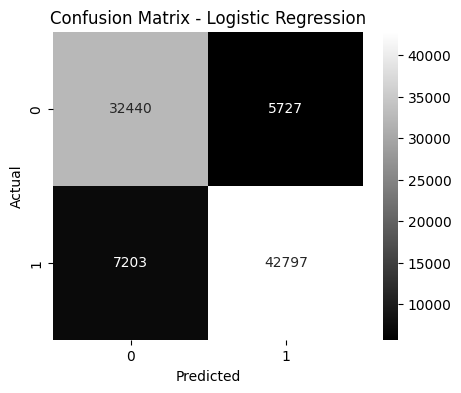

In [68]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), annot=True, fmt='d', cmap='gray')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

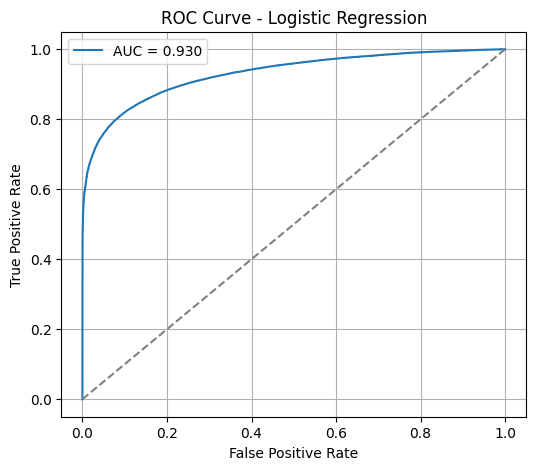

In [69]:
# ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_test_prob_lr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_lr:.3f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
import joblib

# Save the trained Logistic Regression model to a file
joblib.dump(log_reg, 'Logistic_Regression_model.pkl')

print("Logistic Regression model saved successfully as 'logistic_regression_model.pkl'")

Logistic Regression model saved successfully as 'logistic_regression_model.pkl'


---
---

### ***🌲 Random Forest Classifier 🌲***

In [71]:
# Initialize and train model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [72]:
# Predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
y_test_prob_rf = rf.predict_proba(X_test)[:, 1]

In [73]:
# Evaluation metrics
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_test_prob_rf)

print("\n==========================================")
print("--->>> Random Forest Performance <<<---")
print("==========================================")
print(f"Training Accuracy : {train_acc_rf:.4f}")
print(f"Testing Accuracy  : {test_acc_rf:.4f}")
print(f"ROC-AUC Score     : {roc_auc_rf:.4f}")
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_rf))


--->>> Random Forest Performance <<<---
Training Accuracy : 1.0000
Testing Accuracy  : 0.9995
ROC-AUC Score     : 1.0000

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [74]:
print("\n🔹 Train Classification Report:")
print(classification_report(y_train, rf.predict(X_train)))

print("." * 60)

print("\n🔹 Test Classification Report:")
print(classification_report(y_test, rf.predict(X_test)))


🔹 Train Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    152666
         1.0       1.00      1.00      1.00    199999

    accuracy                           1.00    352665
   macro avg       1.00      1.00      1.00    352665
weighted avg       1.00      1.00      1.00    352665

............................................................

🔹 Test Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



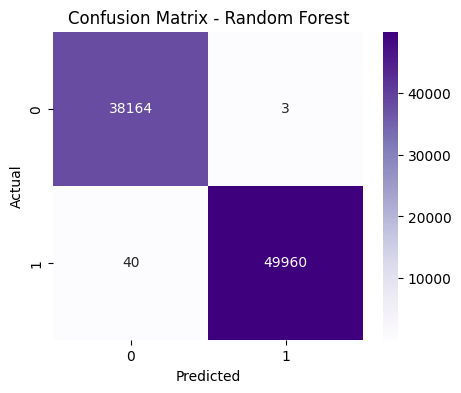

In [75]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

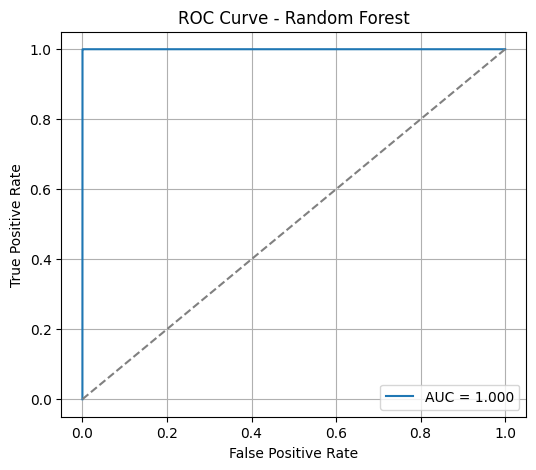

In [76]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_rf:.3f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, 'Random_Forest_model.pkl')

print("Random Forest model saved successfully as 'random_forest_model.pkl'")

Random Forest model saved successfully as 'random_forest_model.pkl'


---
---

### ***🧩 Decision Tree Classifier 🧩***

In [79]:
# Initialize and train model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
# Predictions
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)
y_test_prob_dt = dt.predict_proba(X_test)[:, 1]

In [81]:
# Evaluation metrics
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_test_prob_dt)

print("\n==========================================")
print("--->>> Decision Tree Performance <<<---")
print("=========================================")
print(f"Training Accuracy : {train_acc_dt:.4f}")
print(f"Testing Accuracy  : {test_acc_dt:.4f}")
print(f"ROC-AUC Score     : {roc_auc_dt:.4f}")
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_dt))



--->>> Decision Tree Performance <<<---
Training Accuracy : 1.0000
Testing Accuracy  : 0.9997
ROC-AUC Score     : 0.9997

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [82]:
print("\n🔹 Train Classification Report:")
print(classification_report(y_train, dt.predict(X_train)))

print("." * 60)

print("\n🔹 Test Classification Report:")
print(classification_report(y_test, dt.predict(X_test)))


🔹 Train Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    152666
         1.0       1.00      1.00      1.00    199999

    accuracy                           1.00    352665
   macro avg       1.00      1.00      1.00    352665
weighted avg       1.00      1.00      1.00    352665

............................................................

🔹 Test Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



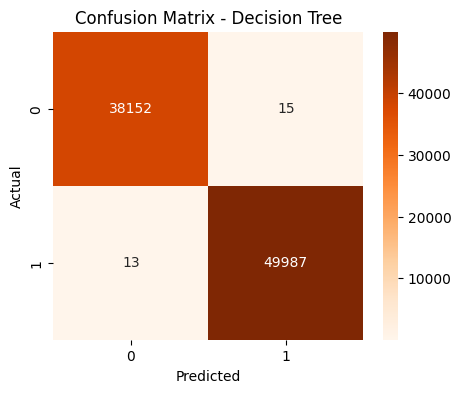

In [83]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

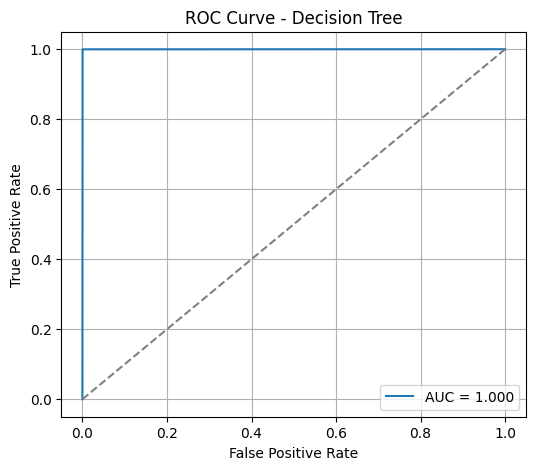

In [84]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob_dt)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_dt:.3f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
import joblib

# Save the trained Decision Tree model to a file
joblib.dump(dt, 'Decision_Tree_model.pkl')

print("Decision Tree model saved successfully as 'decision_tree_model.pkl'")

Decision Tree model saved successfully as 'decision_tree_model.pkl'


---
---

### ***⚡ XGBoost Classifier ⚡***

In [86]:
# Initialize and train model
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [87]:
# Predictions
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)
y_test_prob_xgb = xgb.predict_proba(X_test)[:, 1]

In [88]:
# Evaluation metrics
train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_test_prob_xgb)

print("\n==============================")
print("--->>> XGBoost Performance <<<---")
print("==============================")
print(f"Training Accuracy : {train_acc_xgb:.4f}")
print(f"Testing Accuracy  : {test_acc_xgb:.4f}")
print(f"ROC-AUC Score     : {roc_auc_xgb:.4f}")
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_xgb))


--->>> XGBoost Performance <<<---
Training Accuracy : 0.9988
Testing Accuracy  : 0.9989
ROC-AUC Score     : 1.0000

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [89]:
print("\n🔹 Train Classification Report:")
print(classification_report(y_train, xgb.predict(X_train)))

print("." * 60)

print("\n🔹 Test Classification Report:")
print(classification_report(y_test, xgb.predict(X_test)))


🔹 Train Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    152666
         1.0       1.00      1.00      1.00    199999

    accuracy                           1.00    352665
   macro avg       1.00      1.00      1.00    352665
weighted avg       1.00      1.00      1.00    352665

............................................................

🔹 Test Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



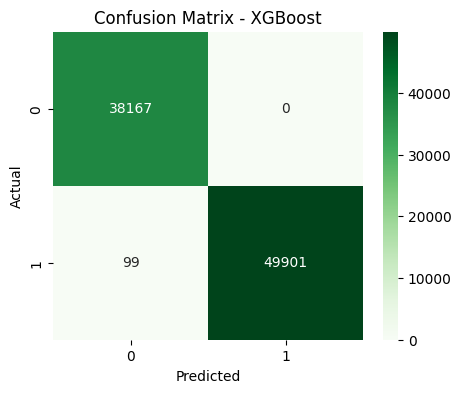

In [90]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

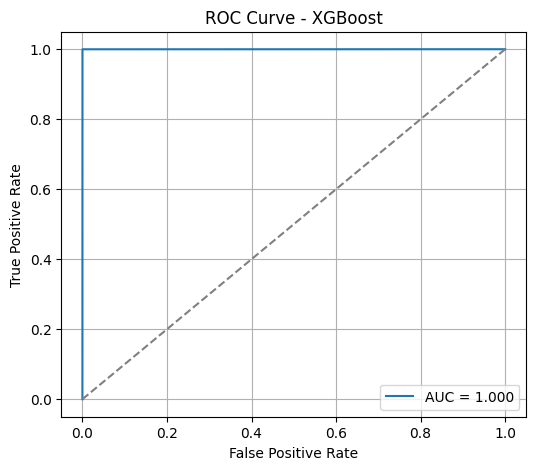

In [91]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob_xgb)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_xgb:.3f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb, 'XGBoost_model.pkl')

print("XGBoost model saved successfully as 'xgboost_model.pkl'")

XGBoost model saved successfully as 'xgboost_model.pkl'


---
---

### ***🤝 K-Nearest Neighbors (KNN) 🤝***

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
# Initialize and train model

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [95]:
# Predictions
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)
y_test_prob_knn = knn.predict_proba(X_test)[:, 1]  # Probability for class 1

In [96]:
# Evaluation metrics
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_test_prob_knn)


print("\n--->>> K-Nearest Neighbors (KNN) Performance <<<---")

print(f"Training Accuracy : {train_acc_knn:.4f}")
print(f"Testing Accuracy  : {test_acc_knn:.4f}")
print(f"ROC-AUC Score     : {roc_auc_knn:.4f}")


--->>> K-Nearest Neighbors (KNN) Performance <<<---
Training Accuracy : 0.9665
Testing Accuracy  : 0.9539
ROC-AUC Score     : 0.9852


In [97]:
# Classification Reports
print("\n🔹 Train Classification Report:")
print(classification_report(y_train, y_train_pred_knn))

print("." * 60)

print("\n🔹 Test Classification Report:")
print(classification_report(y_test, y_test_pred_knn))


🔹 Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    152666
         1.0       1.00      0.94      0.97    199999

    accuracy                           0.97    352665
   macro avg       0.96      0.97      0.97    352665
weighted avg       0.97      0.97      0.97    352665

............................................................

🔹 Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     38167
         1.0       1.00      0.92      0.96     50000

    accuracy                           0.95     88167
   macro avg       0.95      0.96      0.95     88167
weighted avg       0.96      0.95      0.95     88167



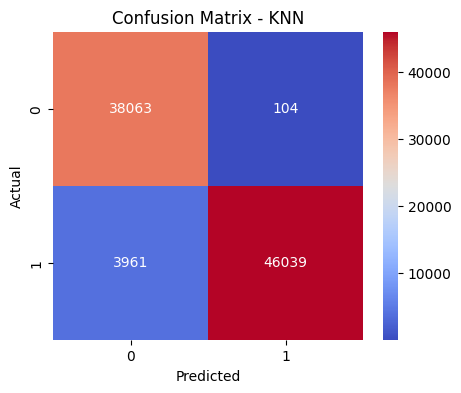

In [98]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

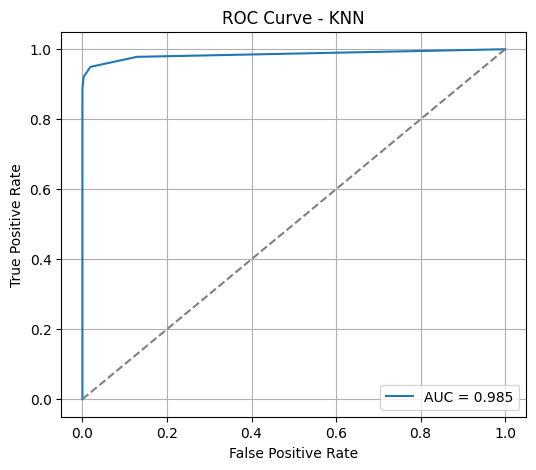

In [99]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob_knn)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_knn:.3f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title('ROC Curve - KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
import joblib

# Save the trained KNN model
joblib.dump(knn, 'kNN_model.pkl')

print("K-Nearest Neighbors (KNN) model saved successfully as 'knn_model.pkl'")

K-Nearest Neighbors (KNN) model saved successfully as 'knn_model.pkl'


---
---

# 📊 **Model Comparison — Customer Churn Prediction**

This section presents a comparative performance analysis of all trained machine learning models, evaluated on **training** and **testing datasets** using **Accuracy** and **ROC-AUC Score**.  
The **ROC-AUC Score** is particularly important as it measures the model’s ability to distinguish between churn and non-churn customers.

---

## ⚙️ **Model Performance Summary**

| 🧠 Model | 🏋️‍♂️ Training Accuracy | 🧪 Testing Accuracy | 🎯 ROC-AUC Score |
|:----------|:-----------------------:|:-------------------:|:----------------:|
| 🔹 **Logistic Regression** | 0.8538 | 0.8533 | 0.9300 |
| 🌲 **Random Forest** | 1.0000 | 0.9995 | 1.0000 |
| 🌳 **Decision Tree** | 1.0000 | 0.9997 | 0.9997 |
| ⚡ **XGBoost** | 0.9988 | 0.9989 | 1.0000 |
| 🔵 **K-Nearest Neighbors (KNN)** | 0.9665 | 0.9539 | 0.9852 |

---

## 📈 **Observations & Insights**

1. **Random Forest** and **XGBoost** deliver *outstanding performance* with near-perfect accuracy and AUC, indicating strong predictive capability.  
   - However, both models may exhibit slight **overfitting**, as the training accuracy is extremely high (≈1.0).  

2. **Decision Tree** also achieves excellent results but is more prone to **overfitting**, given its deterministic structure.  

3. **K-Nearest Neighbors (KNN)** performs very well with an AUC of **0.985**, suggesting strong separation power despite slightly lower accuracy compared to ensemble models.  

4. **Logistic Regression**, while less powerful, remains a **stable and interpretable** baseline model, offering good generalization without overfitting.  




---
---

<div style="border: 5px solid yellow; padding: 10px; background-color: #F5F5DC; color: blue; border-radius: 30px 45px 30px 45px;">


<img src="https://t4.ftcdn.net/jpg/04/00/26/99/360_F_400269908_gDF8JR2ctyHWiL1kww6WEWBerRzD5MBb.jpg" alt="My Image">


</div>
